In [ ]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
# Step 2: Load the preprocessed dataset
file_path = '/content/preprocessed_train_dataset.csv'  # Replace with actual path if needed
df = pd.read_csv(file_path)

In [ ]:
# Step 3: Explore the dataset
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

Dataset Head:
    Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

   cluster_category  outliers_luxury  outliers_fresh  outliers_dry  \
0                 4                0               0             0   
1                 1                0               0             0   
2                 4                0               0             0   
3                 4                0               0             0   
4                 4                0               0             0   

   outlet_city_encoded  
0                   12  
1                   15  
2                   21  
3                   21  
4                   12  

Data

In [ ]:
df.drop(['Customer_ID','outlet_city','outliers_luxury', 'outliers_fresh', 'outliers_dry','outlet_city_encoded'], axis=1, inplace=True)

In [ ]:
# Step 4: Handle missing values in the target column
df = df.dropna(subset=['cluster_category'])  # Remove rows with NaN in the target

In [ ]:
X = df.drop('cluster_category', axis=1)  # Define features
y = df['cluster_category']  # Define target variable

In [ ]:
df.columns

Index(['luxury_sales', 'fresh_sales', 'dry_sales', 'cluster_category'], dtype='object')

In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 7: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Step 8: Evaluate the Model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9496393894378781

Confusion Matrix:
 [[56494     3     5   196     5     2]
 [    5 46225     4     5     4   191]
 [    2     1  9307     1  5323     3]
 [  261     4     4 51203     4     3]
 [    1     2  5450     3  6432     2]
 [    7   188     3     9     5 50888]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     56705
           2       1.00      1.00      1.00     46434
           3       0.63      0.64      0.63     14637
           4       1.00      0.99      1.00     51479
           5       0.55      0.54      0.54     11890
           6       1.00      1.00      1.00     51100

    accuracy                           0.95    232245
   macro avg       0.86      0.86      0.86    232245
weighted avg       0.95      0.95      0.95    232245



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9496


In [ ]:
# Step 10: Save the model
import joblib
joblib.dump(clf, 'decision_tree_model.pkl')
print("Model saved as decision_tree_model.pkl")

Model saved as decision_tree_model.pkl


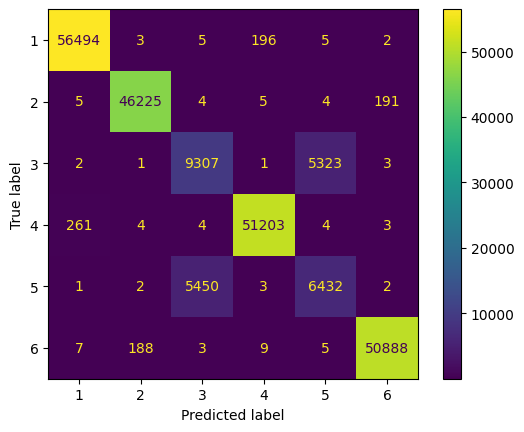

In [ ]:
#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix


#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_clf = confusion_matrix(y_test, y_pred, labels = clf.classes_)


#Plot the confusion matrix
# The first argument to ConfusionMatrixDisplay should be the confusion matrix (cm_clf), not the classifier (clf).
disp_clf_cm = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=clf.classes_)
disp_clf_cm.plot()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


<Figure size 800x600 with 0 Axes>

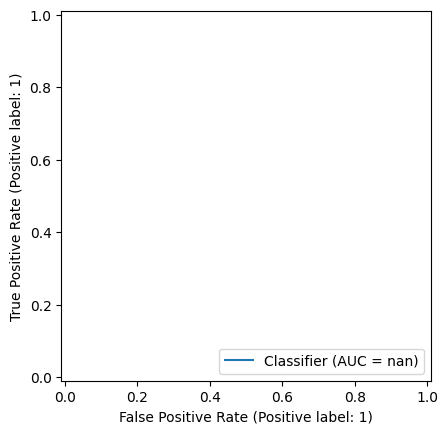

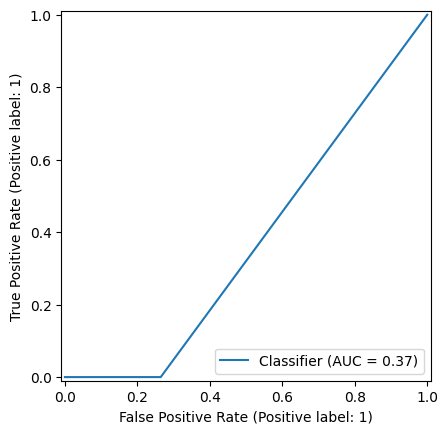

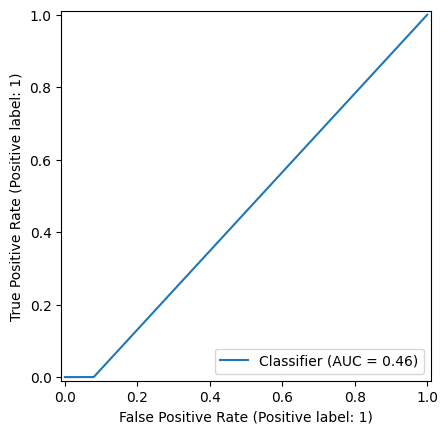

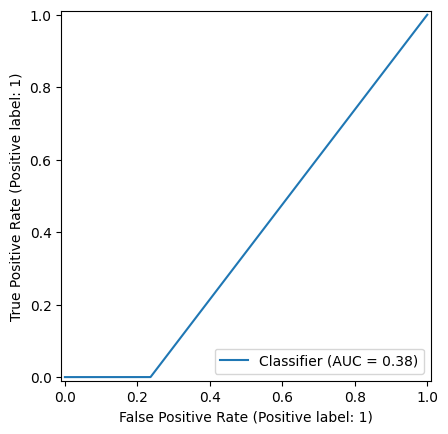

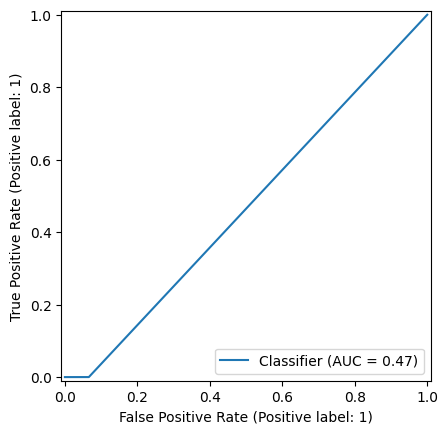

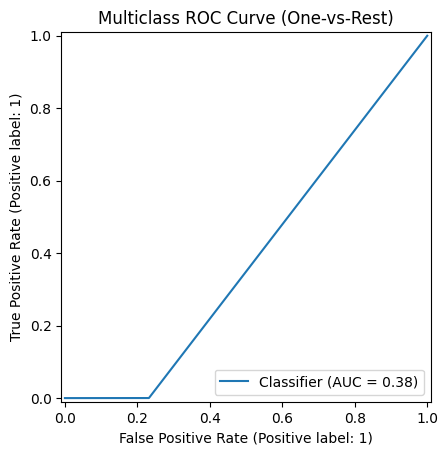

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarize y_test (convert to one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Get probability scores for each class
y_score = clf.predict_proba(X_test)

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score[:, i])

plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.show()


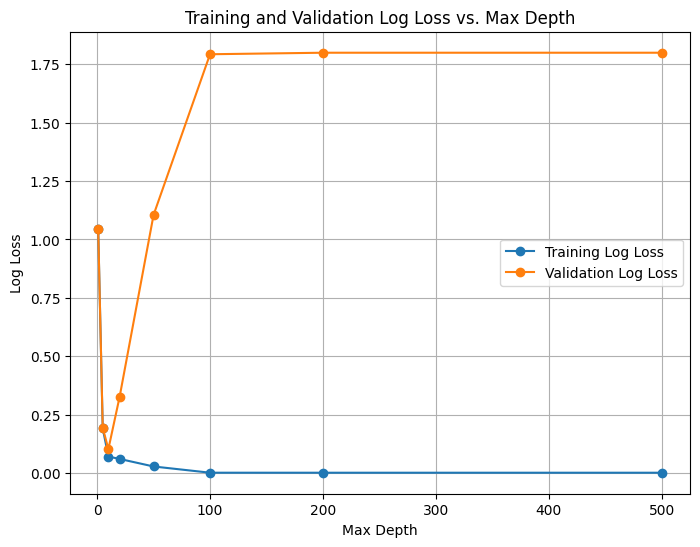

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Define max_depth values to test
depths = [1, 5, 10, 20, 50, 100, 200, 500]

train_errors = []
val_errors = []

for depth in depths:
    clf.set_params(max_depth=depth)
    clf.fit(X_train, y_train)

    # Predict probabilities for log loss
    y_train_proba = clf.predict_proba(X_train)
    y_val_proba = clf.predict_proba(X_test)

    # Compute log loss
    train_errors.append(log_loss(y_train, y_train_proba))
    val_errors.append(log_loss(y_test, y_val_proba))

# Plot log loss curve
plt.figure(figsize=(8, 6))
plt.plot(depths, train_errors, label="Training Log Loss", marker='o', linestyle='-')
plt.plot(depths, val_errors, label="Validation Log Loss", marker='o', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Log Loss")
plt.title("Training and Validation Log Loss vs. Max Depth")
plt.legend()
plt.grid(True)
plt.show()


# Hyper parameter tuning- grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [ ]:
test_accuracy = best_clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9534887726323494


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
y_pred = best_clf.predict(X_test)
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print(classification_report_df)

              precision    recall  f1-score        support
1              0.997789  0.994674  0.996229   56705.000000
2              0.994016  0.998169  0.996089   46434.000000
3              0.829678  0.398032  0.537975   14637.000000
4              0.994076  0.997514  0.995792   51479.000000
5              0.548184  0.899916  0.681333   11890.000000
6              0.998487  0.994403  0.996441   51100.000000
accuracy       0.953489  0.953489  0.953489       0.953489
macro avg      0.893705  0.880451  0.867310  232245.000000
weighted avg   0.962752  0.953489  0.951148  232245.000000


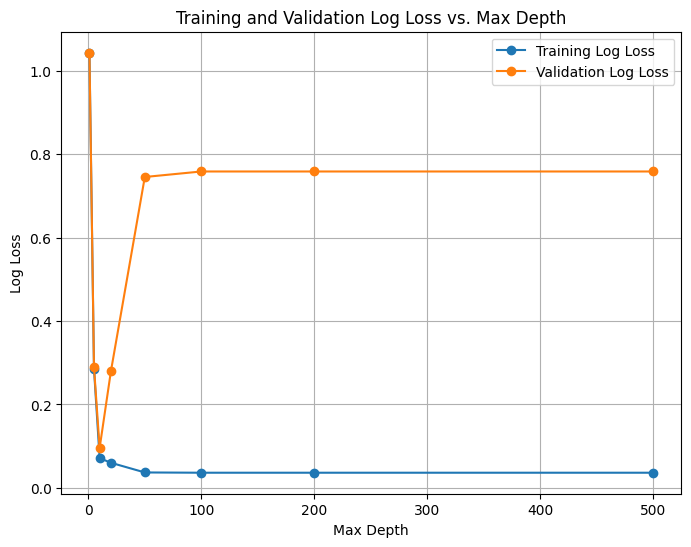

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Define max_depth values to test
depths = [1, 5, 10, 20, 50, 100, 200, 500]

train_errors = []
val_errors = []

for depth in depths:
    # Set the max_depth of the best model
    best_clf.set_params(max_depth=depth)
    best_clf.fit(X_train, y_train)

    # Predict probabilities for log loss
    y_train_proba = best_clf.predict_proba(X_train)
    y_val_proba = best_clf.predict_proba(X_test)

    # Compute log loss
    train_errors.append(log_loss(y_train, y_train_proba))
    val_errors.append(log_loss(y_test, y_val_proba))

# Plot log loss curve
plt.figure(figsize=(8, 6))
plt.plot(depths, train_errors, label="Training Log Loss", marker='o', linestyle='-')
plt.plot(depths, val_errors, label="Validation Log Loss", marker='o', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Log Loss")
plt.title("Training and Validation Log Loss vs. Max Depth")
plt.legend()
plt.grid(True)
plt.show()